In [5]:
#Lê Quốc An 19146142
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.layers import Conv2D, MaxPool2D, Flatten
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/FaceID',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/FaceID',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 90 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [6]:
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0,2))
model.add(Dense(3,activation='Softmax'))
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(training_set,
                  steps_per_epoch=len(training_set),
                  batch_size = 64,
                  epochs=150,
                  validation_data=test_set,
                  validation_steps=len(test_set),
                  callbacks=callbacks,
                  verbose = 1)


Epoch 1/150
3/3 [==============================] - 42s 16s/step - loss: 18.6014 - accuracy: 0.5333 - val_loss: 3.0538 - val_accuracy: 0.6222
Epoch 2/150
3/3 [==============================] - 32s 12s/step - loss: 0.8169 - accuracy: 0.8889 - val_loss: 2.6855e-04 - val_accuracy: 1.0000
Epoch 3/150
3/3 [==============================] - 29s 10s/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 2.4901e-05 - val_accuracy: 1.0000
Epoch 4/150
3/3 [==============================] - 29s 10s/step - loss: 0.1051 - accuracy: 0.9556 - val_loss: 5.3049e-04 - val_accuracy: 1.0000
Epoch 5/150
3/3 [==============================] - 29s 10s/step - loss: 1.3593 - accuracy: 0.8778 - val_loss: 5.5536e-04 - val_accuracy: 1.0000
Epoch 6/150
3/3 [==============================] - 29s 10s/step - loss: 0.8929 - accuracy: 0.9000 - val_loss: 3.3179e-04 - val_accuracy: 1.0000
Epoch 7/150
3/3 [==============================] - 29s 11s/step - loss: 0.2428 - accuracy: 0.9778 - val_loss: 4.2781 - val_accuracy: 0.6222

In [7]:

score = model.evaluate(test_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.0
Độ chính xác kiểm tra là:  1.0


In [8]:
model.save('model_faceCNN.h5')

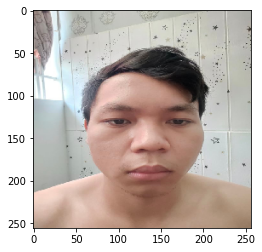

In [9]:
from tensorflow.keras.models import load_model
model=load_model('model_faceCNN.h5')
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
test_img=load_img('/content/drive/MyDrive/FaceID/An/An1.jpg',target_size=(256,256))
plt.imshow(test_img)


An


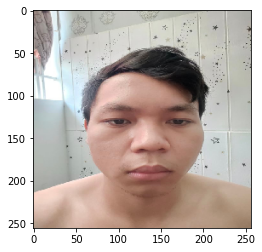

In [11]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
test_img=load_img('/content/drive/MyDrive/FaceID/An/An1.jpg',target_size=(256,256))
plt.imshow(test_img)
import numpy as np
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="An"
elif round(result[0][1])==1:
   prediction="Anh"
elif round(result[0][2])==1:
   prediction="Thức"  
print(prediction) 


Anh


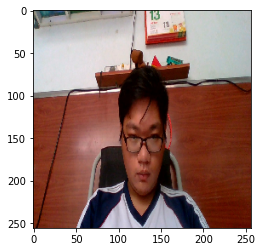

In [13]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
test_img=load_img('/content/drive/MyDrive/FaceID/Anh/Anh1.jpg',target_size=(256,256))
plt.imshow(test_img)
import numpy as np
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="An"
elif round(result[0][1])==1:
   prediction="Anh"
elif round(result[0][2])==1:
   prediction="Thức"  
print(prediction) 


Thức


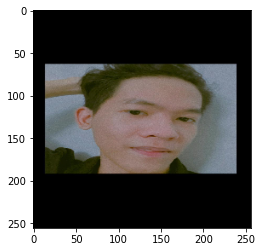

In [15]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
test_img=load_img('/content/drive/MyDrive/FaceID/Thức/Thuc1.jpg',target_size=(256,256))
plt.imshow(test_img)
import numpy as np
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="An"
elif round(result[0][1])==1:
   prediction="Anh"
elif round(result[0][2])==1:
   prediction="Thức"  
print(prediction) 

An


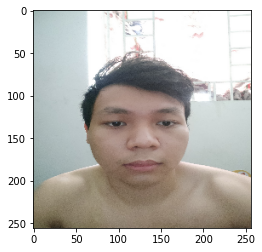

In [16]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
test_img=load_img('/5f1b3b60769ab7c4ee8b.jpg',target_size=(256,256))
plt.imshow(test_img)
import numpy as np
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="An"
elif round(result[0][1])==1:
   prediction="Anh"
elif round(result[0][2])==1:
   prediction="Thức"  
print(prediction) 